In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data

In [2]:
# Renaming column
df = pd.read_csv('mall customers.csv',names=['CustomerID', 'Gender', 'Age', 'Income', 'Score'], skiprows=1) 
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Droping CustomerID
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
# Correlation
df.corr()

,Age,Income,Score
Age,1.000000,-0.012398,-0.327227
Income,-0.012398,1.000000,0.009903
Score,-0.327227,0.009903,1.000000


<AxesSubplot:>

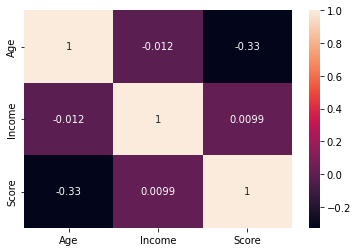

In [5]:
sns.heatmap(df.corr(), annot=True)

# Visualization

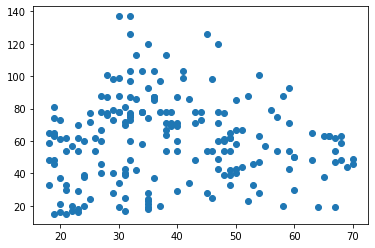

In [6]:
plt.scatter(df['Age'], df['Income'])

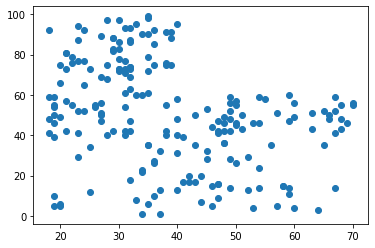

In [7]:
plt.scatter(df['Age'], df['Score'])

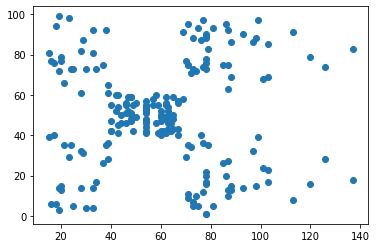

In [8]:
plt.scatter(df['Income'], df['Score'])

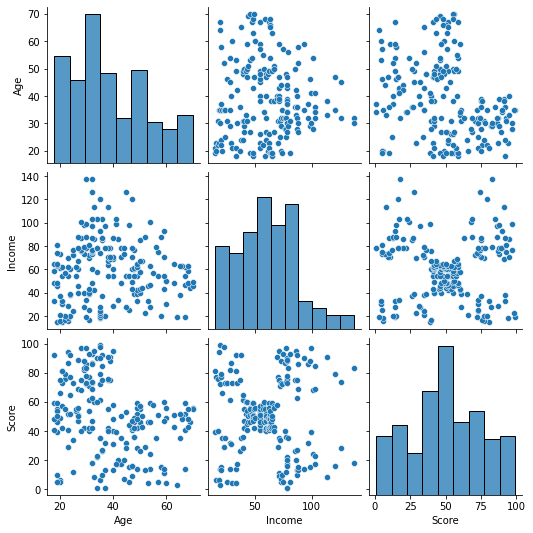

In [9]:
#pairplot
sns.pairplot(df[['Age', 'Income', 'Score']])

# Default KMeans

In [10]:
import sklearn.cluster as cls

In [11]:
kmeans = cls.KMeans()

In [12]:
kmeans.fit(df[['Income', 'Score']])

KMeans()

In [13]:
# centroids
kmeans.cluster_centers_

array([[ 78.55172414,  82.17241379],
       [ 47.29545455,  51.40909091],
       [ 80.18181818,  12.68181818],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  22.        ],
       [109.7       ,  82.        ],
       [ 63.72093023,  46.1627907 ]])

In [14]:
# prediction
df['clusters'] = kmeans.predict(df[['Income', 'Score']])
df.head()

,Gender,Age,Income,Score,clusters
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [15]:
df0 = df[df['clusters'] == 0]
df1 = df[df['clusters'] == 1]
df2 = df[df['clusters'] == 2]
df3 = df[df['clusters'] == 3]
df4 = df[df['clusters'] == 4]
df5 = df[df['clusters'] == 5]
df6 = df[df['clusters'] == 6]
df7 = df[df['clusters'] == 7]

In [16]:
df.shape

(200, 5)

In [17]:
df0.shape

(29, 5)

In [18]:
df7.shape

(43, 5)

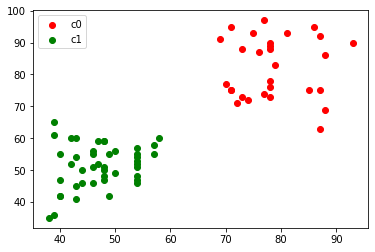

In [19]:
plt.scatter(df0['Income'], df0['Score'], c='red', label='c0')
plt.scatter(df1['Income'], df1['Score'], c='green', label='c1')
plt.legend()

In [20]:
centers = kmeans.cluster_centers_

# Smart Visualization

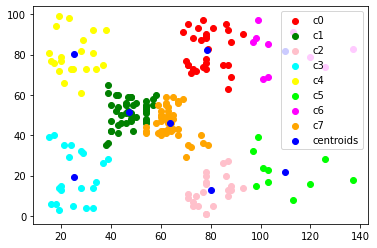

In [21]:
plt.scatter(df0['Income'], df0['Score'], c='red', label='c0')
plt.scatter(df1['Income'], df1['Score'], c='green', label='c1')
plt.scatter(df2['Income'], df2['Score'], c='pink', label='c2')
plt.scatter(df3['Income'], df3['Score'], c='cyan', label='c3')
plt.scatter(df4['Income'], df4['Score'], c='yellow', label='c4')
plt.scatter(df5['Income'], df5['Score'], c='lime', label='c5')
plt.scatter(df6['Income'], df6['Score'], c='magenta', label='c6')
plt.scatter(df7['Income'], df7['Score'], c='orange', label='c7')

plt.scatter(centers[:,0], centers[:,1], c='blue', label='centroids')
plt.legend()

# Select Optimal Number of clusters

In [22]:
wcss = []
clusters = range(1,15)
for k in clusters:
    kmeans_tuned = cls.KMeans(n_clusters=k)
    kmeans_tuned.fit(df[['Income', 'Score']])
    wcss.append(kmeans_tuned.inertia_)

C:\Users\saman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


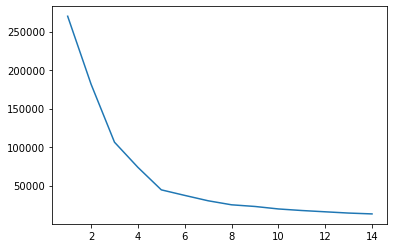

In [23]:
plt.plot(clusters, wcss)

In [24]:
!pip install kneed

In [25]:
from kneed import KneeLocator

In [26]:
kn = KneeLocator(clusters, wcss, curve = 'convex', direction = 'decreasing')

In [27]:
kn.knee

5

In [28]:
print('Optimal No of clusters:', kn.knee)

Optimal No of clusters: 5


# After Tuning

In [29]:
kmeans_optimal = cls.KMeans(n_clusters=5)

In [30]:
# fit and predict altogether
df['new_cluster'] = kmeans_optimal.fit_predict(df[['Income', 'Score']])
df.head()

,Gender,Age,Income,Score,clusters,new_cluster
0,Male,19,15,39,3,3
1,Male,21,15,81,4,4
2,Female,20,16,6,3,3
3,Female,23,16,77,4,4
4,Female,31,17,40,3,3


In [31]:
centers_optimal = kmeans_optimal.cluster_centers_
centers_optimal

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

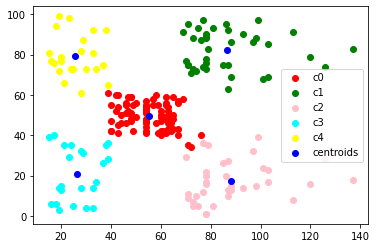

In [32]:
df0 = df[df['new_cluster'] == 0]
df1 = df[df['new_cluster'] == 1]
df2 = df[df['new_cluster'] == 2]
df3 = df[df['new_cluster'] == 3]
df4 = df[df['new_cluster'] == 4]



plt.scatter(df0['Income'], df0['Score'], c='red', label='c0')
plt.scatter(df1['Income'], df1['Score'], c='green', label='c1')
plt.scatter(df2['Income'], df2['Score'], c='pink', label='c2')
plt.scatter(df3['Income'], df3['Score'], c='cyan', label='c3')
plt.scatter(df4['Income'], df4['Score'], c='yellow', label='c4')


plt.scatter(centers_optimal[:,0], centers_optimal[:,1], c='blue', label='centroids')
plt.legend()